<b>Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense , MaxPooling2D

<b>Load MNIST Dataset

In [2]:
# Load the Dataset
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

# Display the Shape of the Dataset
print(f"Shape of the X Train is : {x_train.shape}")
print(f"Shape of the Y Train is : {y_train.shape}")
print(f"Shape of the X Test  is : {x_test.shape}")
print(f"Shape of the Y Test  is : {y_test.shape}")

Shape of the X Train is : (60000, 28, 28)
Shape of the Y Train is : (60000,)
Shape of the X Test  is : (10000, 28, 28)
Shape of the Y Test  is : (10000,)


<b>Visualization MNIST Dataset

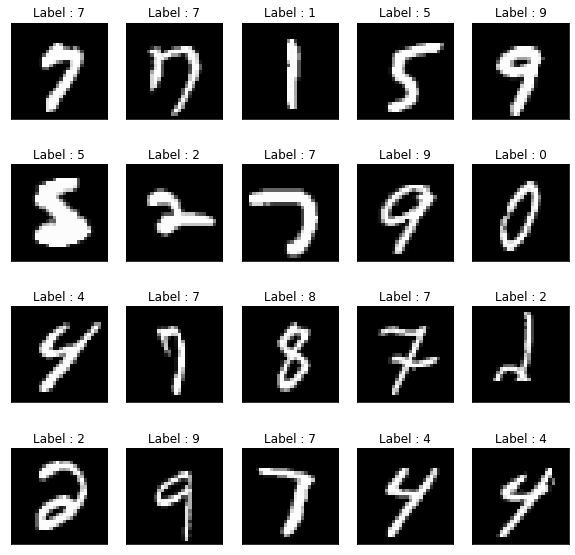

In [3]:
# Set the Figure
plt.figure(figsize = (10,10))

# Display the 20 Images with Randomly
for index in range(20):
    plt.subplot(4,5,index+1)
    img_no = random.randint(0,60000)
    plt.imshow(x_train[img_no] , cmap = "gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label : {y_train[img_no]}")
plt.show()

<b>Image Preprocessing

In [4]:
# Chnage the Type of Images (convert into floating point)
x_train = x_train.astype(np.float64)
x_test  = x_test.astype(np.float64)

# Convert the Label into OneHotEncoder
y_train = to_categorical(y_train , num_classes=10)
y_test  = to_categorical(y_test  , num_classes=10)

# Normalize the Data
x_train /= 255
x_test  /= 255

# Reshape
x_train = x_train.reshape(len(x_train) , 28*28)
x_test  = x_test.reshape(len(x_test) , 28*28)

# Display the Shape of the Training and Testing
print(f"Shape of the X Train is : {x_train.shape}")
print(f"Shape of the Y Train is : {y_train.shape}")
print(f"Shape of the X Test  is : {x_test.shape}")
print(f"Shape of the Y Test  is : {y_test.shape}")

Shape of the X Train is : (60000, 784)
Shape of the Y Train is : (60000, 10)
Shape of the X Test  is : (10000, 784)
Shape of the Y Test  is : (10000, 10)


<b>Implementation of AutoEncoder

In [5]:
# Create the Encoder Part
input_image = Input(shape=(784))
encoder = Dense(128 , activation = "relu")(input_image)
encoder = Dense(64  , activation = "relu")(encoder)
encoder = Dense(30  , activation = "relu")(encoder)

# Create the LATIN Representation
encoder = Dense(20 , activation = "relu" , name = "BOT")(encoder)


# Create the Decorder Part
decoder = Dense(30  , activation = "relu" , name = "BOT1")(encoder)
decoder = Dense(64  , activation = "relu" , name = "BOT2")(decoder)
decoder = Dense(128 , activation = "relu" , name = "BOT3")(decoder)
decoder = Dense(784 , activation = "sigmoid" , name = "output")(decoder)

# Create the Model
AutoEncoder = Model(inputs = input_image , outputs = decoder)
AutoEncoder.compile(optimizer = "adam" , loss = "binary_crossentropy")

# Display the Summary of the Model
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 30)                1950      
                                                                 
 BOT (Dense)                 (None, 20)                620       
                                                                 
 BOT1 (Dense)                (None, 30)                630       
                                                                 
 BOT2 (Dense)                (None, 64)                1984  

In [6]:
# Extract the Encoder Part in the AutoEncoder
EncoderModel = Model(inputs = input_image , outputs = AutoEncoder.get_layer("BOT").output)

# Display the Summary of the Encoder Model
EncoderModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 30)                1950      
                                                                 
 BOT (Dense)                 (None, 20)                620       
                                                                 
Total params: 111,306
Trainable params: 111,306
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Extract the Decoder Part in the AutoEncoder
encoder_output = Input(shape=(20,))
decoder = AutoEncoder.get_layer("BOT1")(encoder_output)
decoder = AutoEncoder.get_layer("BOT2")(decoder)
decoder = AutoEncoder.get_layer("BOT3")(decoder)
decoder = AutoEncoder.get_layer("output")(decoder)

DecoderModel = Model(inputs = encoder_output , outputs = decoder)

# Display the Summary of the Decoder Model
DecoderModel.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 BOT1 (Dense)                (None, 30)                630       
                                                                 
 BOT2 (Dense)                (None, 64)                1984      
                                                                 
 BOT3 (Dense)                (None, 128)               8320      
                                                                 
 output (Dense)              (None, 784)               101136    
                                                                 
Total params: 112,070
Trainable params: 112,070
Non-trainable params: 0
_________________________________________________________________


<b>Train the AutoEncoder Model

In [8]:
history = AutoEncoder.fit(x_train , x_train , batch_size = 64 , epochs = 20)

Epoch 1/20
938/938 [==============================] - 7s 6ms/step - loss: 0.1971
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1421
Epoch 3/20
938/938 [==============================] - 7s 7ms/step - loss: 0.1298
Epoch 4/20
938/938 [==============================] - 6s 7ms/step - loss: 0.1220
Epoch 5/20
938/938 [==============================] - 6s 7ms/step - loss: 0.1176
Epoch 6/20
938/938 [==============================] - 7s 7ms/step - loss: 0.1143
Epoch 7/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1121
Epoch 8/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1105
Epoch 9/20
938/938 [==============================] - 7s 8ms/step - loss: 0.1093
Epoch 10/20
938/938 [==============================] - 7s 7ms/step - loss: 0.1083
Epoch 11/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1074
Epoch 12/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1067
Epoch 13/20
938/938 [====

<b>Predict the Results

In [9]:
# Reduce the Dimensions of the Image
encoderImages = EncoderModel.predict(x_test)

# Display the Shape of the Encoder Images
print(f"Reduce Dimensions of the Encoder Test Images is : {encoderImages.shape}")

313/313 [==============================] - 1s 1ms/step
Reduce Dimensions of the Encoder Test Images is : (10000, 20)


In [11]:
# Recreate the Actuall Image with the Help of Decoder
DecoderImages = DecoderModel.predict(encoderImages)

# Display the Shape of the Decoder Images
print(f"Recreate the Test Images with Decoder : {DecoderImages.shape}")

313/313 [==============================] - 1s 2ms/step
Recreate the Test Images with Decoder : (10000, 784)


<b>Visualization the Decoder Generate Images

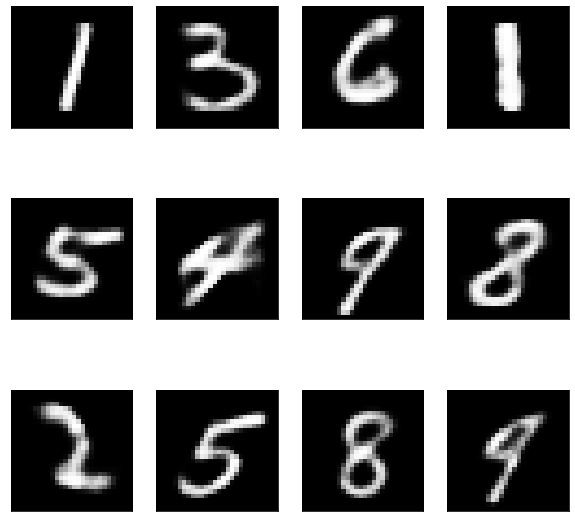

In [16]:
# Display the Decoder Generate Images
plt.figure(figsize = (10,10))

for index in range(12):
    plt.subplot(3,4,index + 1)
    choice = random.randint(0,10000)
    plt.imshow(DecoderImages[choice].reshape(28,28) , cmap = "gray")
    plt.xticks([])
    plt.yticks([])
plt.show()